In [1]:
import cv2

In [2]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"

In [52]:
# Path to the video file
video_path = 'data2.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")

The frames per second (fps) of the video is: 29


In [4]:
import cv2
import os

video_path = 'data2.mp4'
extraction_path = r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"

# Ensure extraction_path ends with a separator (backslash for Windows)
if not extraction_path.endswith(os.path.sep):
    extraction_path += os.path.sep

cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

frames_count = 0

while True:
    ret, img = cap.read()
    frames_count += 1

    if not ret:
        print("All frames extracted")
        break

    if frames_count % 2 == 0:  # Save every second frame
        filename = f"{extraction_path}frame{frames_count // 2}.jpg"
        cv2.imwrite(filename, img)

# Release the video capture object
print(f"Total frames extracted: {frames_count // 2}")
cap.release()
print(total_frames)

All frames extracted
Total frames extracted: 424
848


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [5]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
# weights - neural network parameters like bias,propagation etcc.
# cfg - configuration , architecture

In [6]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2"

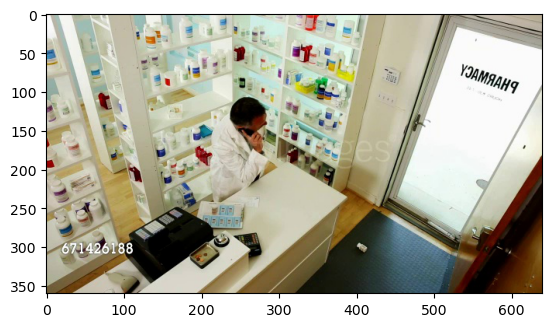

In [7]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames2\frame424.jpg")   # reading image using its name
plt.imshow(img)

# Human detection

In [87]:
# Create a dictionary to store the class IDs and the corresponding classes
import numpy as np
class_to_id = {
    1: "First person alone",
    2: "Second person alone",
    0: "Both in the frame"
}
max_person_id=0
# Initialize an empty dictionary to track detected persons and their trackers
detected_persons = {}
current_person_id = 0
printed_person_ids = set()
data=[]
total_frame=total_frames//2+1
for i in range(1, total_frame):

    frame_path = extraction_path + "\\frame%d.jpg" % i
    image = cv2.imread(frame_path)
    height, width = image.shape[:2]

    # Preprocess the frames for YOLOv3
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    
    net.setInput(blob)

    # Get output
    outs = net.forward(net.getUnconnectedOutLayersNames())
    
    # Thresholds
    conf_threshold = 0.5
    nms_threshold = 0

    # Define lists for detection
    class_ids = []
    confidences = []
    boxes = []

    # Detection process
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold and class_id == 0:  # class_id = 0 means people
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Reset the person ID when it reaches 2
    current_person_id = 0

    # Draw bounding boxes without tracking
    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)  # Green color
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        
        # Increment the person ID
        current_person_id += 1
        max_person_id = max(max_person_id, current_person_id)  # Update max_person_id

        is_alone = True
        for other_index in indices:
            if other_index != index:
                is_alone = False
                break

        # Assign the class ID
        if is_alone:
            class_id = 1
        else:
            class_id = 0

        # Append the data as a dictionary
        data.append({
            "Frame Name": f"frame{i}.jpg",
            "Person ID": current_person_id,
            "Class": class_to_id[class_id]
        })

    # id_frame_class=(f"Frame Name: frame{i}.jpg, Person ID: {current_person_id}, Class: {class_to_id[class_id]}")

    #         print(id_frame_class)
        printed_person_ids.add(current_person_id)

    # Display the frame with bounding boxes
    resized_image = cv2.resize(image, (800, 600))
    cv2.imshow("Bounding box", resized_image)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

print("indeces ",indices)
cv2.destroyAllWindows()

indeces  [1]


# Counting people

In [88]:
print("total person in the video ",max_person_id)
# printed uing the count of current_person_id if an new id is created means a count will be added on 

total person in the video  2


# Calculate screen time of each person

In [118]:
# WORST QUALITY


# from pytube import YouTube as yt
# video_link = "https://www.youtube.com/watch?v=9h2bKsJ7j_c"
# vid = yt(video_link)
# stream = vid.streams.first()
# stream.download()

'C:\\Users\\HARISH A K\\Desktop\\python\\Deep_Learning\\Deep_learning_projects\\screen_time_and_boundingBox\\Donut (30-Second Ad).3gpp'

In [89]:

import pandas as pd
df=pd.DataFrame(data)
df

,Frame Name,Person ID,Class
0,frame1.jpg,1,First person alone
1,frame2.jpg,1,First person alone
2,frame3.jpg,1,First person alone
3,frame4.jpg,1,First person alone
4,frame5.jpg,1,First person alone
...,...,...,...
563,frame420.jpg,1,First person alone
564,frame421.jpg,1,First person alone
565,frame422.jpg,1,First person alone
566,frame423.jpg,1,First person alone


In [113]:
first_person_alone_count = len(df[df['Class'] == 'First person alone'])

# Count rows where Class is 'Both in the frame'
both_in_frame_count = len(df[df['Class'] == 'Both in the frame'])

print(f"Count of 'First person  : {first_person_alone_count} frames ")
print(f"Count of 'Both in the frame': {both_in_frame_count} frames" )

Count of 'First person  : 280 frames 
Count of 'Both in the frame': 288 frames


In [115]:
first_person_frames = 280

both_person_frames = 288

frame_rate = 14

total_frames = 424

frame_rate=14

total_time= total_frames/frame_rate

screenTime_person1 = first_person_frames/frame_rate
print("First person screen time is  ",screenTime_person1)

screenTime_person2= total_time - screenTime_person1
print("Second person screen time is ",screenTime_person2)

shared_screenTime = both_person_frames/frame_rate
print("Shared screen time is ",shared_screenTime)

First person screen time is   20.0
Second person screen time is  10.285714285714285
Shared screen time is  20.571428571428573
